In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv(r'C:\Users\RaghulRamesh\Downloads\Ericsson\Ericsson\USA_Housing.csv')

In [33]:
!pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


You should consider upgrading via the 'c:\users\raghulramesh\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [18]:
!pip install seaborn

You should consider upgrading via the 'c:\users\raghulramesh\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
df.rename(columns={'Avg. Area Income':'Area Income',
                  'Avg. Area House Age':'House Age',
                  'Avg. Area Number of Rooms':'No Of Rooms',
                   'Avg. Area Number of Bedrooms':'No Of Bedrooms',
                  'Area Population':'Population'},inplace=True)

In [8]:
df.head()

,Area Income,House Age,No Of Rooms,No Of Bedrooms,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5000, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Income     5000 non-null   float64
 1   House Age       5000 non-null   float64
 2   No Of Rooms     5000 non-null   float64
 3   No Of Bedrooms  5000 non-null   float64
 4   Population      5000 non-null   float64
 5   Price           5000 non-null   float64
 6   Address         5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [15]:
df.describe()

,Area Income,House Age,No Of Rooms,No Of Bedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [16]:
df.corr()

,Area Income,House Age,No Of Rooms,No Of Bedrooms,Population,Price
Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
No Of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
No Of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

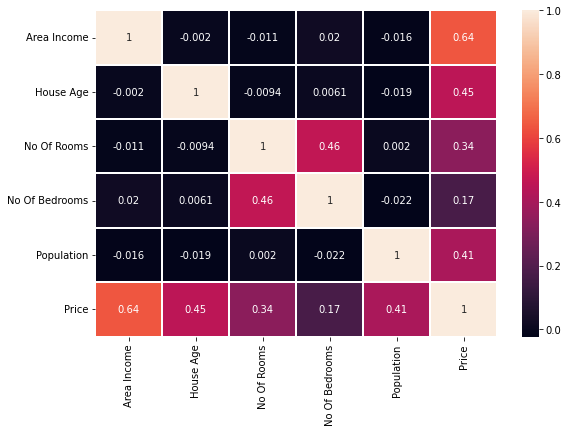

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True,linewidth=2)

In [26]:
df=df.drop(columns=['Address'])

In [27]:
df.head()

,Area Income,House Age,No Of Rooms,No Of Bedrooms,Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [28]:
X=df.iloc[:,:5]
y=df['Price']

In [29]:
X.head()

,Area Income,House Age,No Of Rooms,No Of Bedrooms,Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [30]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
X_train.shape

(3500, 5)

In [37]:
X_test.shape

(1500, 5)

In [38]:
y_train.shape

(3500,)

In [39]:
y_test.shape

(1500,)

In [40]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
y_predicted=lr.predict(X_test)

In [45]:
round(r2_score(y_test,y_predicted),2)

0.92

In [46]:
lr.predict([[61287.067179,5.865890,8.512727,5.13,36882.159400]])

c:\users\raghulramesh\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1254362.99127633])

# SERIALIZATION

In [47]:
import pickle

In [48]:
with open('mymodel.pkl','wb') as fh:
    pickle.dump(lr,fh)

In [49]:
#+==========================================

In [50]:
#+++++++++++++++++++++++++++++++++++++++++++++++++

In [51]:
with open('mymodel.pkl','rb') as fh:
    mdl=pickle.load(fh)

In [52]:
mdl.predict([[59982.197226,5.040555,7.839388,4.23,26354.109472]])

c:\users\raghulramesh\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([845841.0704499])